In [1]:
import numpy as np
import matplotlib.pyplot as plt
#! pip install statsmodels
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import numpy as np
from pylab import meshgrid
import math

### Answer 7.1
Consider the function f(x1, x2) = x1** 2 +(x2 − 2)** 2

#### 1. Plot the function in 3D.

<Figure size 432x288 with 0 Axes>

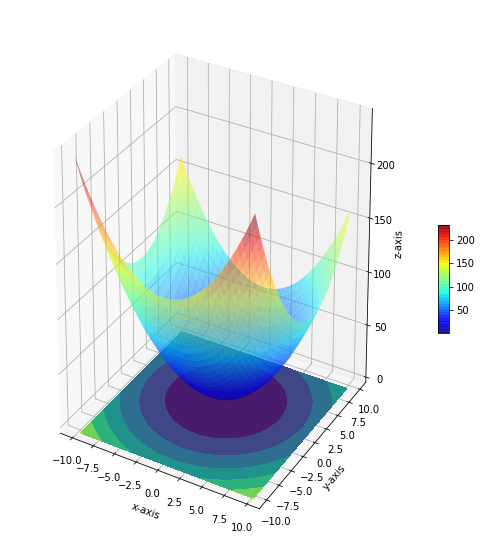

In [5]:
# function to be plotted 7.4
def z_func(x1,x2):
    return (x1**2 +(x2-2)**2)

x1 = np.arange(-10.0, 10, 0.1) # x1 >= 0 according to given conditions
x2 = np.arange(-10.0, 10, 0.1) # x2 <= 1 according to given conditions

X1,X2 = meshgrid(x1, x2)
Z = z_func(X1, X2)

fig = plt.figure()
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax = fig.gca(projection='3d')
#surf = ax.plot_surface(X1, X2, Z, rstride=1, cstride=1,vmin=0, vmax=np.nanmax(Z),linewidth=0, antialiased=False)
surf = ax.plot_surface(X1, X2, Z, rstride=5, cstride=5, cmap = 'jet', alpha = .5)

ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.view_init(elev=25)
ax.contourf(X1, X2, Z, zdir='z', offset=-8)
fig.colorbar(surf, shrink=0.2, aspect=10) # legend
plt.show()

### Q 7.2 
Write a python code that gets as input  
i) an initial point (x10,x20)  
ii) the maximum number of iterations of the gradient descent,  
iii) learning rate ρ;  
and runs the gradient descent algorithm starting from the initial point until convergence or until the maximum number of iterations is achieved. The output of the code must be the sequence of points (starting from initial point
and ending with the last point) obtained by the gradient descent.


### Ans 7.2  

In [88]:
from numpy import linalg as LA
def get_norm(x1,x2):
    dfdx1 = 2* x1
    dfdx2 = 2* (x2-2)
    grad_norm = 0
    try:
        grad_norm = LA.norm([dfdx1,dfdx2],2)
#         grad_norm = LA.norm([dfdx1,dfdx2],1)
    except ValueError:
        print('Error')
    return grad_norm

In [145]:
# Answer 7.2
def getGradientDescent(cur_x1,cur_x2,rate,precision,max_iters):

    iters = 0                         #iteration counter
    df = lambda x1,x2: 2*x1 + 2*x2 -4 #Gradient of our function 
    df1 = lambda x1: 2*x1
    df2 = lambda x2: 2*x2 -4
    f = lambda x1,x2: x1**2 + (x2 -2)**2
    x1_trace = []
    x2_trace = []
    x1_trace.append(cur_x1)
    x2_trace.append(cur_x2)
    error = 1
    while error >= 0.0001 and iters < max_iters:
        prev_x1,prev_x2 = cur_x1,cur_x2       # Store current x value in prev_x
        f_prev = f(prev_x1,prev_x2)
        cur_x1 = cur_x1 - rate * df1(prev_x1) # Grad descent x1
        cur_x2 = cur_x2 - rate * df2(prev_x2) # Grad descent x2
        f_cur = f(cur_x1,cur_x2)
        #error = abs(f_prev-f_cur)             # znew,zold
        error = math.sqrt( math.pow((2*cur_x1),2) +  math.pow((2*cur_x2 -4),2) ) # grad norm
        iters = iters + 1                     #iteration count
        x1_trace.append(cur_x1)
        x2_trace.append(cur_x2)

    if iters == max_iters:
        print("Maximum iterations reached!")
    else:
        print("Iteration",iters,"\nx1,x2 value is(",cur_x1,cur_x2,")") #Print iterations

        print("The global minimum occurs at", cur_x1,cur_x2)
    return x1_trace,x2_trace

### Q.7.3
#### Use the learning rate ρ = 0.01 and the initial point (x1, x2) = (1, 1). Plot the sequence of obtained points. After how many iterations does GD converge?

### Answer 7.3


In [165]:
# calling the above function for learning rate = 0.01, initial points (1,1)

x1_trace,x2_trace = getGradientDescent(1,1,.01,0.001,10000)
# printing the points at each iteration

for i in range(len(x1_trace)):
    print("(",x1_trace[i],",", x2_trace[i],")")
            

Iteration 508 
x1,x2 value is( 3.4901689600712515e-05 1.9999650983103991 )
The global minimum occurs at 3.4901689600712515e-05 1.9999650983103991
( 1 , 1 )
( 0.98 , 1.02 )
( 0.9604 , 1.0396 )
( 0.941192 , 1.058808 )
( 0.92236816 , 1.07763184 )
( 0.9039207968 , 1.0960792032 )
( 0.885842380864 , 1.1141576191359999 )
( 0.86812553324672 , 1.1318744667532799 )
( 0.8507630225817856 , 1.1492369774182143 )
( 0.8337477621301499 , 1.16625223786985 )
( 0.8170728068875469 , 1.1829271931124532 )
( 0.800731350749796 , 1.199268649250204 )
( 0.7847167237348001 , 1.2152832762652 )
( 0.769022389260104 , 1.230977610739896 )
( 0.7536419414749019 , 1.246358058525098 )
( 0.7385691026454039 , 1.261430897354596 )
( 0.7237977205924958 , 1.276202279407504 )
( 0.7093217661806459 , 1.290678233819354 )
( 0.6951353308570329 , 1.304864669142967 )
( 0.6812326242398923 , 1.3187673757601077 )
( 0.6676079717550945 , 1.3323920282449055 )
( 0.6542558123199925 , 1.3457441876800074 )
( 0.6411706960735927 , 1.358829303926407

In [148]:
# Plotting the trajectory of points 
def get3dPlot(x1_trace,x2_trace):
    def z_func(x1,x2):
        return (x1**2 +(x2-2)**2)

    x1 = np.arange(-2, 2, 0.05) 
    x2 = np.arange(-2, 2, 0.05) 

    X1,X2 = meshgrid(x1, x2)
    Z = z_func(X1, X2)

    # for gradient decent plotting
    x1_trace_n=np.array(x1_trace)
    x2_trace_n=np.array(x2_trace)
    ztr = z_func(x1_trace_n, x2_trace_n)


    fig = plt.figure()
    fig = plt.figure(figsize = (30,30))
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax = fig.gca(projection='3d')

    # plotting the function
    surf = ax.plot_surface(X1, X2, Z, rstride=1, cstride=1, alpha = .3, vmax=np.nanmax(Z),cmap = 'jet')

    # plotting the points in gradient descent
    ax.plot(x1_trace_n,x2_trace_n,ztr, marker = '*', color = 'r', alpha = .4, label = 'Gradient descent')
    ax.set_xlabel('x-axis')
    ax.set_ylabel('y-axis')
    ax.set_zlabel('z-axis')
    ax.view_init(elev=25)
    plt.show()

<Figure size 432x288 with 0 Axes>

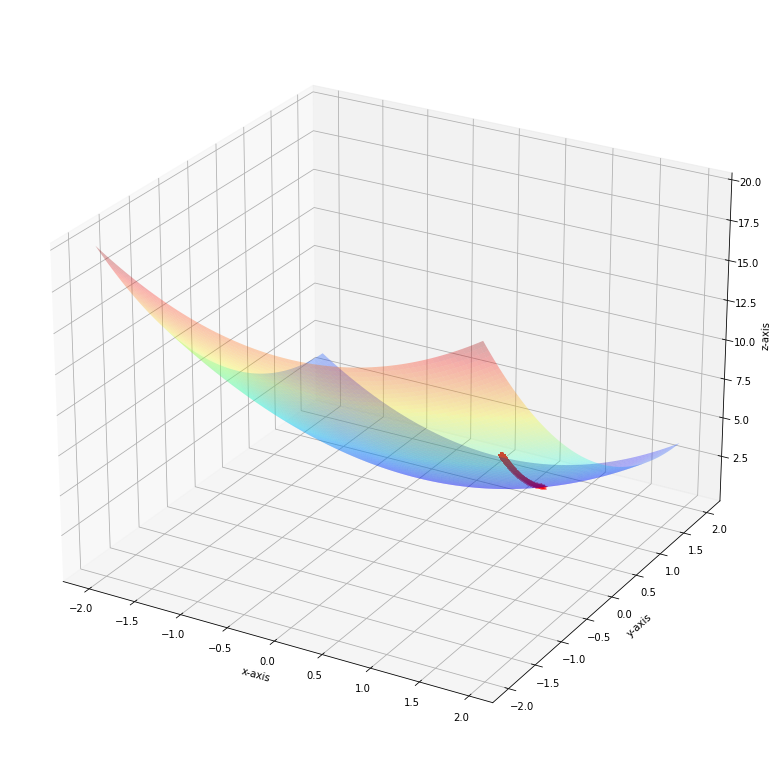

In [149]:
get3dPlot(x1_trace,x2_trace)

#### Plot to show the trajectory of convegence

<function matplotlib.pyplot.show(close=None, block=None)>

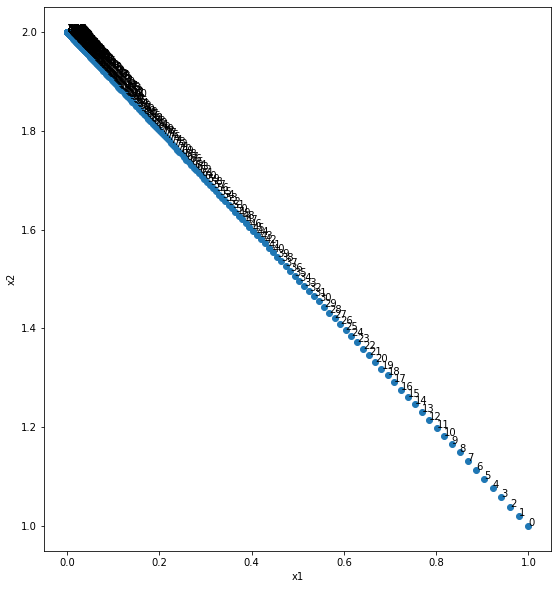

In [150]:
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(1, 2, 1)


ax.scatter(x1_trace,x2_trace)
for i in range(len(x1_trace)):
    ax.text(x1_trace[i],x2_trace[i], i)
ax.set_xlabel('x1')
ax.set_ylabel('x2')


plt.show

 ### Convergence happens in  508 iterations for a learning rate of 0.01 , at ( 3.4901689600712515e-05 1.9999650983103991 )
 
 

### Q.7.4
#### Use the learning rate ρ = 0.1 and the initial point (x1, x2) = (1, 1). Plot the sequence of obtained points. After how many iterations does GD converge?

### Answer 7.4

In [166]:
# calling the above function for learning rate = 0.1, initial points (1,1)

x1_trace,x2_trace = getGradientDescent(1,1,0.1,0.001,10000)

# printing the points at each iteration
for i in range(len(x1_trace)):
    print("(",x1_trace[i],",", x2_trace[i],")")
            

Iteration 46 
x1,x2 value is( 3.4844914372704106e-05 1.9999651550856272 )
The global minimum occurs at 3.4844914372704106e-05 1.9999651550856272
( 1 , 1 )
( 0.8 , 1.2 )
( 0.64 , 1.3599999999999999 )
( 0.512 , 1.488 )
( 0.4096 , 1.5904 )
( 0.32768 , 1.67232 )
( 0.26214400000000004 , 1.737856 )
( 0.20971520000000005 , 1.7902848 )
( 0.16777216000000003 , 1.83222784 )
( 0.13421772800000004 , 1.8657822720000001 )
( 0.10737418240000003 , 1.8926258176000001 )
( 0.08589934592000002 , 1.91410065408 )
( 0.06871947673600001 , 1.931280523264 )
( 0.05497558138880001 , 1.9450244186112 )
( 0.04398046511104001 , 1.95601953488896 )
( 0.035184372088832 , 1.964815627911168 )
( 0.028147497671065603 , 1.9718525023289344 )
( 0.02251799813685248 , 1.9774820018631476 )
( 0.018014398509481985 , 1.9819856014905182 )
( 0.014411518807585589 , 1.9855884811924145 )
( 0.01152921504606847 , 1.9884707849539316 )
( 0.009223372036854777 , 1.9907766279631454 )
( 0.007378697629483821 , 1.9926213023705164 )
( 0.00590295810

<Figure size 432x288 with 0 Axes>

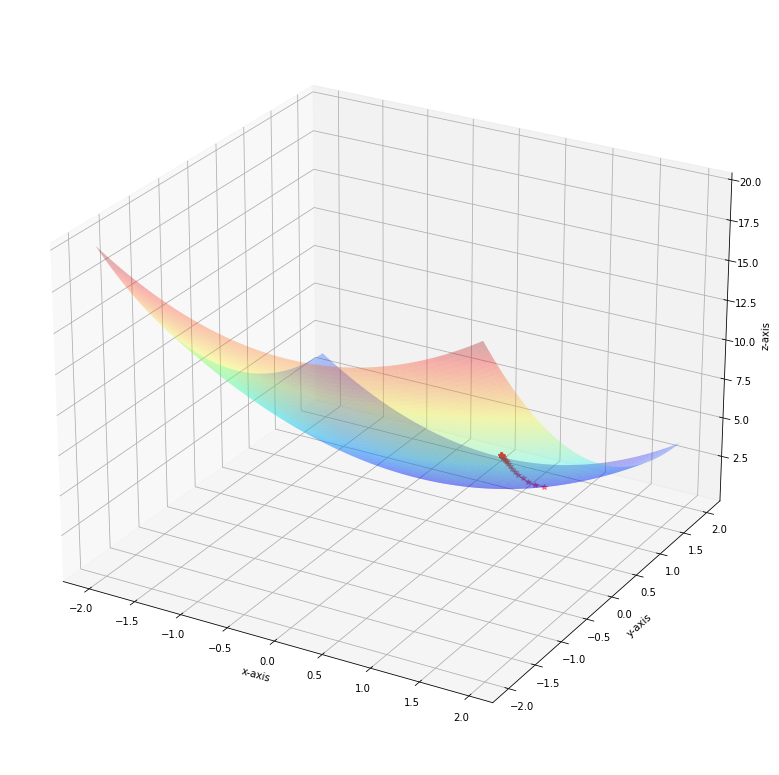

In [152]:
get3dPlot(x1_trace,x2_trace)

#### Plot to show the trajectory of convegence

<function matplotlib.pyplot.show(close=None, block=None)>

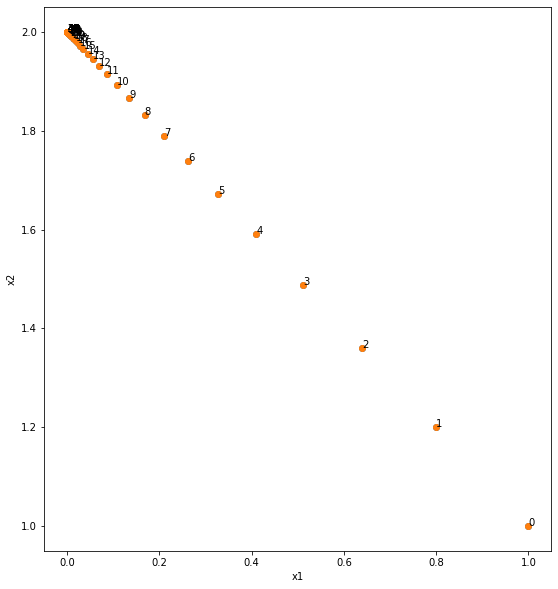

In [153]:
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(1, 2, 1)


ax.scatter(x1_trace,x2_trace)
#for i in range(7):
    #ax.text(x1_trace_n[i],x2_trace_n[i], i)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.scatter(x1_trace,x2_trace)
for i in range(len(x1_trace)):
    ax.text(x1_trace[i],x2_trace[i], i)
plt.show

### Convergence happens in 46 iteration for a learning rate of 0.1 at ( 3.4844914372704106e-05 1.9999651550856272 )


### Q.7.5
#### Use the learning rate ρ = 5 and the initial point (x1, x2) = (1, 1). Plot the sequence of obtained points. After how many iterations does GD converge?

### Answer 7.5

In [168]:
# calling the above function for learning rate = 5, initial points (1,1)
# We have reduced the max_iteration to 160 so that value of the function does not over flow.

x1_trace,x2_trace = getGradientDescent(1,1,5,0.0001,160)

# printing the points at each iteration
for i in range(len(x1_trace)):
    print("(",x1_trace[i],",", x2_trace[i],")")

Maximum iterations reached!
( 1 , 1 )
( -9 , 11 )
( 81 , -79 )
( -729 , 731 )
( 6561 , -6559 )
( -59049 , 59051 )
( 531441 , -531439 )
( -4782969 , 4782971 )
( 43046721 , -43046719 )
( -387420489 , 387420491 )
( 3486784401 , -3486784399 )
( -31381059609 , 31381059611 )
( 282429536481 , -282429536479 )
( -2541865828329 , 2541865828331 )
( 22876792454961 , -22876792454959 )
( -205891132094649 , 205891132094651 )
( 1853020188851841 , -1853020188851839 )
( -16677181699666569 , 16677181699666571 )
( 150094635296999121 , -150094635296999119 )
( -1350851717672992089 , 1350851717672992091 )
( 12157665459056928801 , -12157665459056928799 )
( -109418989131512359209 , 109418989131512359211 )
( 984770902183611232881 , -984770902183611232879 )
( -8862938119652501095929 , 8862938119652501095931 )
( 79766443076872509863361 , -79766443076872509863359 )
( -717897987691852588770249 , 717897987691852588770251 )
( 6461081889226673298932241 , -6461081889226673298932239 )
( -58149737003040059690390169 , 581

##### We see that maximum iterations have reached and the value of x1 and x2 are infinitely large. This means that instead to reachig the global minima the points have overshooted in the opposite directon of global minima for a learning rate of 5.

We try to oberve the first few values of the trajectory followed by the points x1 and x2

In [157]:
for i in range(15):
    print("(",x1_trace[i],",", x2_trace[i],")")

( 1 , 1 )
( -9 , 11 )
( 81 , -79 )
( -729 , 731 )
( 6561 , -6559 )
( -59049 , 59051 )
( 531441 , -531439 )
( -4782969 , 4782971 )
( 43046721 , -43046719 )
( -387420489 , 387420491 )
( 3486784401 , -3486784399 )
( -31381059609 , 31381059611 )
( 282429536481 , -282429536479 )
( -2541865828329 , 2541865828331 )
( 22876792454961 , -22876792454959 )


 We can see the values are growing , so we will be plotting only a part of it as it goes to infinite as it has overshooted instead of reaching the minimum value

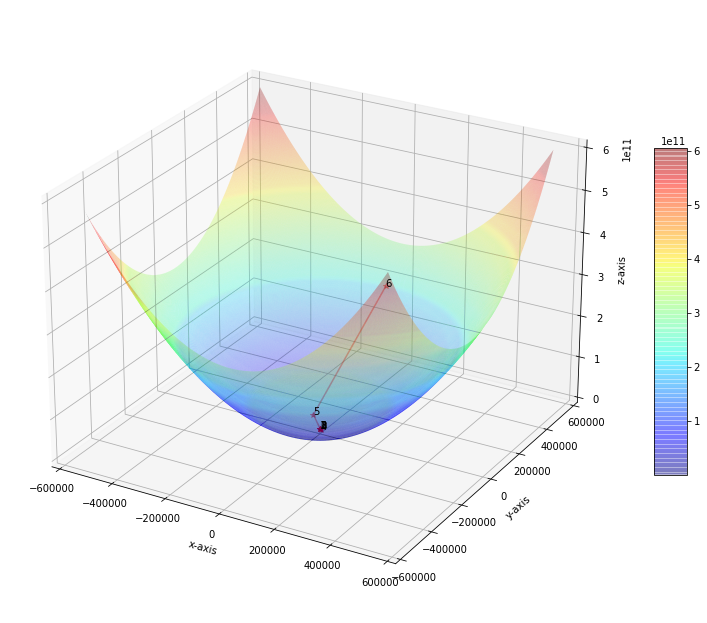

In [163]:
# function to be plotted
def z_func(x1,x2):
    return (x1**2 +(x2-2)**2)

x1 = np.arange(-550000,550000,1000) 
x2 = np.arange(-550000,550000,1000) 

X1,X2 = meshgrid(x1, x2)
Z = z_func(X1, X2)


# for gradient decent plotting
x1_trace_n=np.array(x1_trace[0:7])
x2_trace_n=np.array(x2_trace[0:7])
ztr = z_func(x1_trace_n, x2_trace_n)

# fig = plt.figure()
fig = plt.figure(figsize = (30,30))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax = fig.gca(projection='3d')
# plotting the function
surf = ax.plot_surface(X1, X2, Z, rstride=1, cstride=1, alpha = .3, vmax=np.nanmax(Z),cmap = 'jet')

# plotting the points in gradient descent
ax.plot(x1_trace_n,x2_trace_n,ztr, marker = '*', color = 'r', alpha = .4, label = 'Gradient descent')

ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.view_init(elev=25)
for i in range(7):
    ax.text(x1_trace_n[i],x2_trace_n[i], ztr[i], i)

fig.colorbar(surf, shrink=0.2, aspect=10) # legend
plt.show()





#### Plot to show the trajectory of convegence


Since the value of points are too large to plot, we have taken only 50 points to plot and observe the trajectory of convergence and the points are too close so that the numbering is overlapped.

<function matplotlib.pyplot.show(close=None, block=None)>

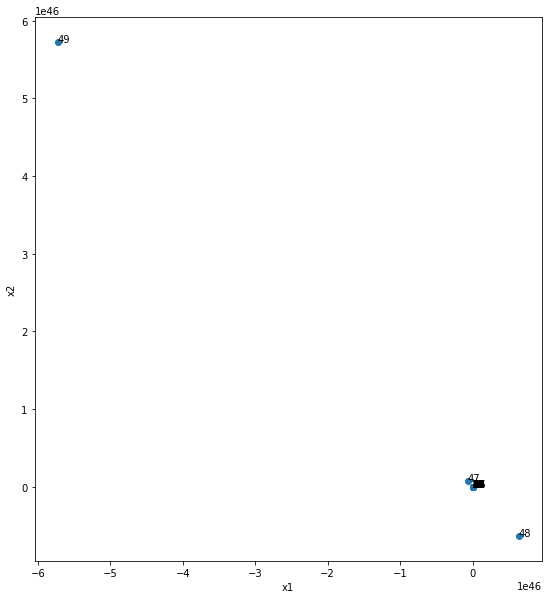

In [169]:

fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(1, 2, 1)

x1_trace_n=np.array(x1_trace[0:50])
x2_trace_n=np.array(x2_trace[0:50])
ax.scatter(x1_trace_n,x2_trace_n)

for i in range(len(x1_trace_n)):
    ax.text(x1_trace_n[i],x2_trace_n[i], i)


ax.set_xlabel('x1')
ax.set_ylabel('x2')



plt.show

### We observe that Convergence is not happening for  a learning rate of 5 
As we see that the points follow a zig zag pattern while moving away from the global minumum value.

### Inference : 
#### We can see from the different scatter plots that if learning rate is less ( here 0.01) , convergence takes more iteration,while for a greater learning rate (here 0.1) the covergence takes lesser iteration. But for very high learning rate( here 5), the convergence never happens, rather the points are moving far away from the minimum value. Therefore choosing a correct learning rate is very important for convergence.

## Answer HW1-8.1 

Consider the training dataset
{(0.10, 0.65),(0.50, 0.10),(0.90, 0.35),(−0.20, 0.17),(−0.5, 0.42),(1.50, 2.62)},  
where in (·, ·), the first entry is the input variable, x, and the second entry is the output variable
(response), y.   
Consider the regression model y = θ1x + θ0.
### 8.1  Write a python code that inputs the above data and outputs the optimal regression value (θ1, θ0), using the closed-form solution.


In [2]:
data = [(0.10, 0.65),(0.50, 0.10),(0.90, 0.35),(-0.20, 0.17),(-0.5, 0.42),(1.50, 2.62)]

In [3]:
x = []
y = []
for val in data:
    x.append(val[0])
    y.append(val[1])
print(y)

[0.65, 0.1, 0.35, 0.17, 0.42, 2.62]


In [4]:
x = np.array(x)
y = np.array(y)
y


array([0.65, 0.1 , 0.35, 0.17, 0.42, 2.62])

We have the model as y = theta1 * x + theta0

theta = [ theta0 theta1 ]

theta = [(xtranspose * x) ** -1 ] * [xtranspose y]

we calculate theta







In [5]:
x.shape

(6,)

We see that the shape of x and y are not in matrix form, so correct the shape of the array

In [6]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)
y.shape


(6, 1)

In [7]:
y

array([[0.65],
       [0.1 ],
       [0.35],
       [0.17],
       [0.42],
       [2.62]])

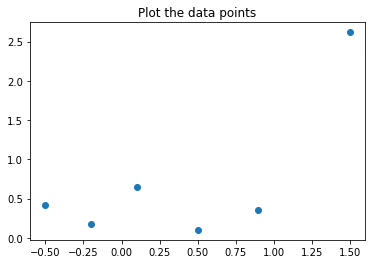

In [8]:
# visualize the data
plt.figure()
plt.scatter(x,y)
plt.title("Plot the data points")
plt.show()

We need to normalise the data

In [9]:
x = (x - x.mean())/x.std()

In [10]:
x

array([[-0.42016956],
       [ 0.17301099],
       [ 0.76619154],
       [-0.86505497],
       [-1.30994038],
       [ 1.65596237]])

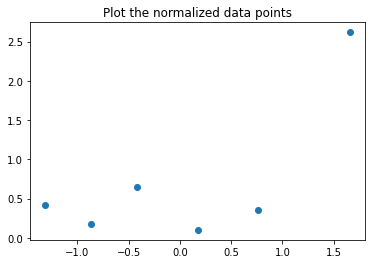

In [11]:
# visualize the  normalized data
plt.figure()
plt.scatter(x,y)
plt.title("Plot the normalized data points")
plt.show()

In [12]:
ones = np.ones((x.shape[0],1))
ones


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [13]:
x_ = np.hstack((x,ones))
x_


array([[-0.42016956,  1.        ],
       [ 0.17301099,  1.        ],
       [ 0.76619154,  1.        ],
       [-0.86505497,  1.        ],
       [-1.30994038,  1.        ],
       [ 1.65596237,  1.        ]])

In [14]:
def getThetaCosedForm(x,y):
    
    a = np.dot(x.T,x)
    b = np.dot(x.T,y)
    theta = np.dot(np.linalg.pinv(a) , b)
    return theta

#### Optimal value of theta 

In [15]:
theta = getThetaCosedForm(x_,y)
theta


array([[0.6089575 ],
       [0.71833333]])

In [16]:
def predict(x,theta):
    return np.dot(x,theta)

### Answer 8.2 Plot the data in 2D and plot the estimated line y = θ1*x + θ0

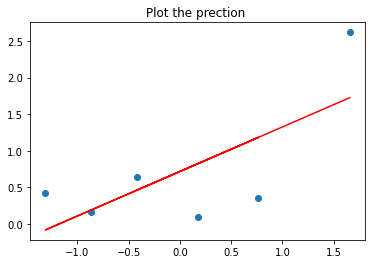

In [17]:
# visualize the prediction
plt.figure()
plt.scatter(x,y)
plt.plot(x,predict(x_,theta),color ='r')
plt.title("Plot the prection ")
plt.show()

### Answer 8.3.    
### Remove the last point, i.e., (1.50,2.62), from the data and repeat the previous part. Is the new estimated line close to the estimated line in the previous part? Provide a justification.

In [18]:
data_new = [(0.10, 0.65),(0.50, 0.10),(0.90, 0.35),(-0.20, 0.17),(-0.5, 0.42)]

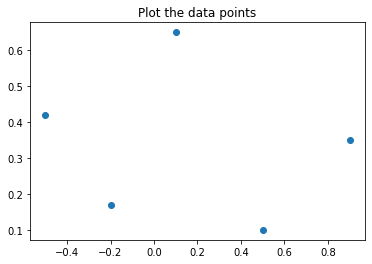

In [19]:
# input data
x_new = []
y_new = []
for val in data_new:
    x_new.append(val[0])
    y_new.append(val[1])
# coverting list to array
x_new = np.array(x_new)
y_new = np.array(y_new)
    
# reshape the data
x_new = x_new.reshape(-1,1)
y_new = y_new.reshape(-1,1)
# visualize the data
plt.figure()
plt.scatter(x_new,y_new)
plt.title("Plot the data points")
plt.show()


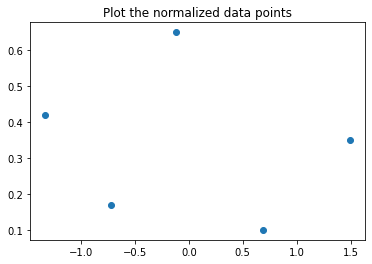

In [20]:
# normalize data and plot

x_new = (x_new - x_new.mean())/x_new.std()
plt.figure()
plt.scatter(x_new,y_new)
plt.title("Plot the normalized data points")
plt.show()


In [21]:
# preparing the matrix form we will need to calculate theta
# creating as array on ones to augment to our training data
ones = np.ones((x_new.shape[0],1))

# adding one in the last column to accomodate our assumption
x_new_ = np.hstack((x_new,ones))

# getting the optimal value of theta
theta_new = getThetaCosedForm(x_new_,y_new)

theta_new



array([[-0.03400573],
       [ 0.338     ]])

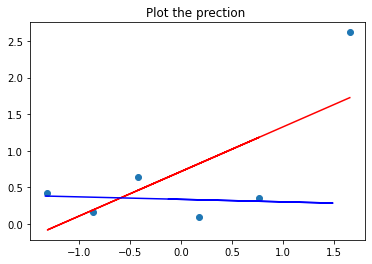

In [22]:
# visualizing the prediction for the old and new theta values
# visualize the prediction
plt.figure()
plt.scatter(x,y)
plt.plot(x,predict(x_,theta),color ='r')
plt.plot(x_new,predict(x_new_,theta_new),color ='b')
plt.title("Plot the prection ")
plt.show()

#### We see that the new line(blue in colour) is not close to the old line (red in colour).   

#### The reason for this is that the point (1.50, 2.62) was clearly an outlier. We can see by observation that this poin is quite far away from the other 5 points. Thus the estimated line for prediction considering this point resulted in the line in red colour which does not seem to be the correct prediction. While removing the point  (1.50, 2.62)  resulted in the line shown in Blue colour, which is a better estimated line. 

#### Thus we see that presence of outliers in the data set greatly affects the performace of the estmated line using closed form of regression and may lead to estimation line which does not give accurate prediction for the any unseen data.